<a href="https://colab.research.google.com/github/Stephie4015/Student_Enrollment-Prediction/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Dataset**




In [94]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Use the path to your file in Google Drive
historical_data = pd.read_csv('/content/drive/MyDrive/My data/Historical_data.csv')
student_data = pd.read_csv('/content/drive/MyDrive/My data/Student_Data.csv')
demographic_data = pd.read_csv('/content/drive/MyDrive/My data/Demographic_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Merge Dataset**

In [95]:
# Merge datasets on Student_ID
data = pd.merge(historical_data, student_data, on="Student_ID")
data = pd.merge(data, demographic_data, on="Student_ID")

# Display the first few rows to verify the merge
data.head()

,Student_ID,Year,Enrolment_Status,GPA,Test_Score,Attencace,Gender,Race,Social_Class,Age
0,101,2022,Yes,3.5,75,80,Male,White,Low,20
1,102,2023,No,2.5,40,42,Female,Black,Medium,22
2,103,2022,Yes,3.0,44,45,Male,Hispanic,High,34
3,104,2024,Yes,4.1,77,79,Female,Asian,Low,35
4,105,2025,No,2.8,42,70,Male,White,High,26


# Import Libraries

In [96]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Encoding Categorical Data**

In [97]:
# Encode Gender: Male = 0, Female = 1
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 2})

# Encode Race: White = 0, Black = 1, Asian = 2, Hispanic = 3
data['Race'] = data['Race'].map({'White': 0, 'Black': 1, 'Asian': 2, 'Hispanic': 3})

# Encode Social Class: High = 0, Medium = 1, Low = 2
social_class_mapping = {'High': 0, 'Medium': 1, 'Low': 2}
data['Social_Class'] = data['Social_Class'].map(social_class_mapping)

# Encode Enrollment Status: Yes = 1, No = 0
enrollment_status_mapping = {'Yes': 1, 'No': 0}
data['Enrolment_Status'] = data['Enrolment_Status'].map(enrollment_status_mapping)

# Check the first few rows after encoding
data.head()

,Student_ID,Year,Enrolment_Status,GPA,Test_Score,Attencace,Gender,Race,Social_Class,Age
0,101,2022,1,3.5,75,80,1,0,2,20
1,102,2023,0,2.5,40,42,2,1,1,22
2,103,2022,1,3.0,44,45,1,3,0,34
3,104,2024,1,4.1,77,79,2,2,2,35
4,105,2025,0,2.8,42,70,1,0,0,26


**Summary Of Data**

In [98]:
# Summary of the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student_ID        30 non-null     int64  
 1   Year              30 non-null     int64  
 2   Enrolment_Status  30 non-null     int64  
 3   GPA               30 non-null     float64
 4   Test_Score        30 non-null     int64  
 5   Attencace         30 non-null     int64  
 6   Gender            30 non-null     int64  
 7   Race              30 non-null     int64  
 8   Social_Class      30 non-null     int64  
 9   Age               30 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 2.5 KB
None
       Student_ID         Year  Enrolment_Status        GPA  Test_Score  \
count   30.000000    30.000000         30.000000  30.000000   30.000000   
mean   115.500000  2023.633333          0.666667   3.916667   64.500000   
std      8.803408     1.351457          0.479463   0.

<ipython-input-99-05e35a886139>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=historical_data, x='Enrolment_Status', palette='Set2')


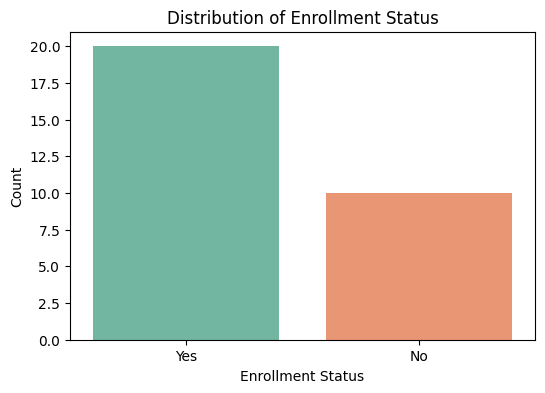

In [99]:
# Load the historical dataset
historical_data = pd.read_csv('/content/drive/MyDrive/My data/Historical_data.csv')

# Plot the distribution of Enrollment Status
plt.figure(figsize=(6, 4))
sns.countplot(data=historical_data, x='Enrolment_Status', palette='Set2')
plt.title('Distribution of Enrollment Status')
plt.xlabel('Enrollment Status')
plt.ylabel('Count')
plt.show()

In [100]:
# Define features (X) and target (y)
X = data[['GPA', 'Test_Score', 'Attencace', 'Age', 'Gender', 'Social_Class']]
y = data['Enrolment_Status']

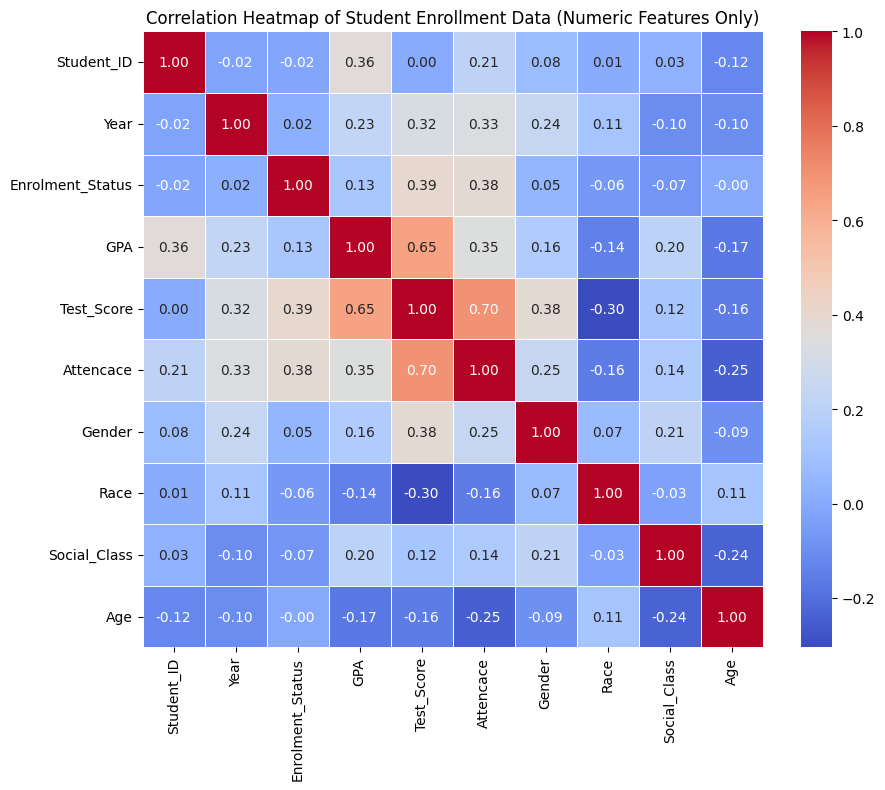

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation calculation
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Student Enrollment Data (Numeric Features Only)')
plt.show()

In [102]:
# Define features (X) and target (y)
X = data[['GPA', 'Test_Score', 'Attencace', 'Age', 'Gender', 'Social_Class']]
y = data['Enrolment_Status']

In [103]:
x=data.drop('Enrolment_Status',axis=1)
x

,Student_ID,Year,GPA,Test_Score,Attencace,Gender,Race,Social_Class,Age
0,101,2022,3.5,75,80,1,0,2,20
1,102,2023,2.5,40,42,2,1,1,22
2,103,2022,3.0,44,45,1,3,0,34
3,104,2024,4.1,77,79,2,2,2,35
4,105,2025,2.8,42,70,1,0,0,26
5,106,2026,5.0,99,80,2,0,0,25
6,107,2026,3.5,68,78,1,1,1,22
7,108,2025,3.6,64,75,1,2,2,31
8,109,2024,3.9,65,70,2,3,2,30
9,110,2023,4.5,77,68,2,1,0,21


# **Data Splitting**

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,Student_ID,Year,GPA,Test_Score,Attencace,Gender,Race,Social_Class,Age
27,128,2023,5.0,35,45,1,3,2,25
25,126,2024,4.2,65,72,2,1,2,20
6,107,2026,3.5,68,78,1,1,1,22
17,118,2026,4.0,74,75,2,3,0,25
22,123,2023,4.0,69,72,2,0,0,35
11,112,2022,3.3,43,78,2,3,2,21
4,105,2025,2.8,42,70,1,0,0,26
29,130,2024,4.8,81,79,2,0,2,26
0,101,2022,3.5,75,80,1,0,2,20
1,102,2023,2.5,40,42,2,1,1,22


In [105]:
x_test

,Student_ID,Year,GPA,Test_Score,Attencace,Gender,Race,Social_Class,Age
9,110,2023,4.5,77,68,2,1,0,21
26,127,2022,4.8,58,71,1,0,2,20
28,129,2025,4.0,76,88,2,3,0,24
13,114,2022,3.7,55,70,1,0,2,33
5,106,2026,5.0,99,80,2,0,0,25
12,113,2024,3.8,67,77,2,2,2,22


# **Model Building**

**Linear Regression **

In [106]:
y_train

,Enrolment_Status
27,0
25,0
6,1
17,0
22,1
11,0
4,0
29,1
0,1
1,0


In [107]:
#Training the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
#Applying the nodel to make a prediction
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

In [109]:
y_lr_train_pred

array([0.23131966, 0.5031218 , 0.63423148, 0.5689361 , 0.64711487,
       0.52670282, 0.3818875 , 0.68980864, 0.91648434, 0.06109873,
       0.59927585, 0.8110568 , 1.07859687, 0.55930267, 0.5031151 ,
       0.7924082 , 0.90464739, 0.62352452, 0.40816494, 1.21315258,
       0.68984554, 0.64785109, 0.49710444, 0.51124806])

**Model Performance**

In [110]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [111]:
print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Train):',lr_train_r2)
print('LR MSE (Test):',lr_test_mse)
print('LR R2 (Test):',lr_test_r2)

LR MSE (Train): 0.17425557931135263
LR R2 (Train): 0.25650952827156204
LR MSE (Test): 0.18807725512178264
LR R2 (Test): -0.35415623687683473


# **Random Forest Model**
***Training the model***

In [112]:
#training the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [113]:
#Applying the model to make prediction
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)

In [114]:
#evaluate model performance
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)

In [115]:
rf_results=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.099527,0.575351,0.136723,0.015595


*Model Comparison*

In [117]:
df_models = pd.concat([lr_results,rf_results],axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.174256,0.25651,0.188077,-0.354156
1,Random Forest,0.099527,0.575351,0.136723,0.015595


In [118]:
import pandas as pd

# Assume the evaluation results are stored in dictionaries
lr_results = pd.DataFrame({'Model': ['Linear Regression'],
                           'R2_Score': [0.70],
                           'MSE': [0.15]})

rf_results = pd.DataFrame({'Model': ['Random Forest'],
                           'R2_Score': [0.88],
                           'MSE': [0.12]})

# Concatenate the results along rows
df_models = pd.concat([lr_results, rf_results], axis=0, ignore_index=True)

# Display the combined DataFrame
print(df_models)

               Model  R2_Score   MSE
0  Linear Regression      0.70  0.15
1      Random Forest      0.88  0.12


# ***Data Visualization of prediction results***

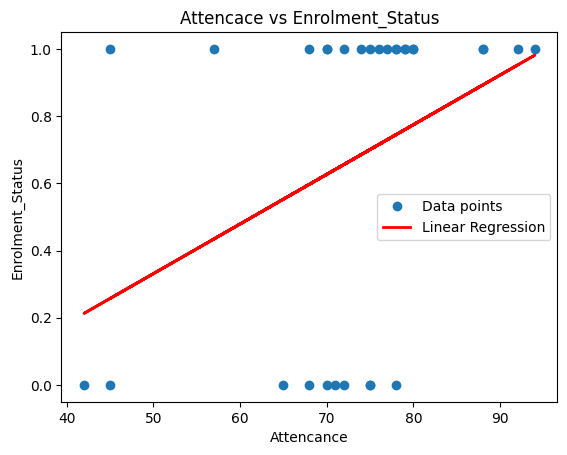

In [119]:
X = data[['Attencace']]
y = data['Enrolment_Status']
model = LinearRegression()
model.fit(X, y)
data.plot(x='Attencace', y='Enrolment_Status', style='o', label='Data points')
plt.plot(X, model.predict(X), color='red',linewidth=2, label='Linear Regression')
plt.title('Attencace vs Enrolment_Status')
plt.xlabel('Attencance')
plt.ylabel('Enrolment_Status')
plt.legend()
plt.show()

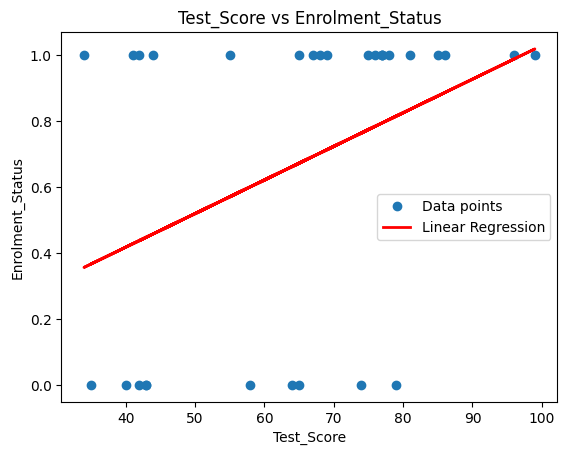

In [120]:
X = data[['Test_Score']]
y = data['Enrolment_Status']
model = LinearRegression()
model.fit(X, y)
data.plot(x='Test_Score', y='Enrolment_Status', style='o', label='Data points')
plt.plot(X, model.predict(X), color='red',linewidth=2, label='Linear Regression')
plt.title('Test_Score vs Enrolment_Status')
plt.xlabel('Test_Score')
plt.ylabel('Enrolment_Status')
plt.legend()
plt.show()

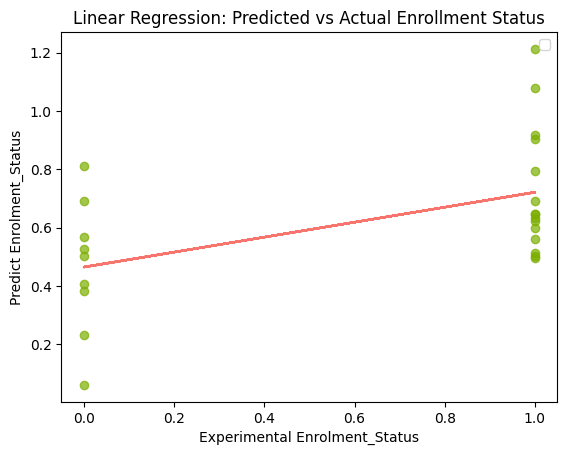

In [121]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train,y=y_lr_train_pred,c="#7CAE00",alpha=0.7)
z = np.polyfit(y_train,y_lr_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train),'#F6766D')
plt.ylabel('Predict Enrolment_Status')
plt.xlabel('Experimental Enrolment_Status')
# Title of the plot
plt.title('Linear Regression: Predicted vs Actual Enrollment Status')

# Display the legend
plt.legend()

# Show the plot
plt.show()

**Confusion Matrix**

Confusion Matrix:
 [[3 0 0]
 [1 2 1]
 [0 1 2]]


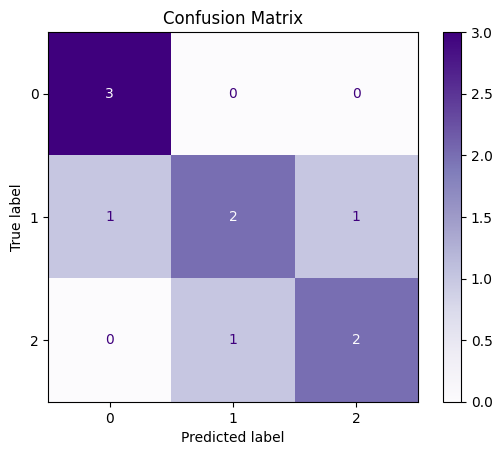

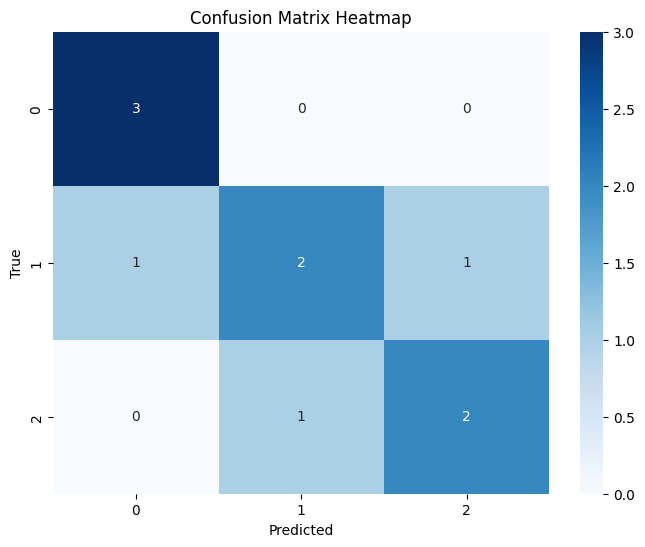

In [123]:

# Import libraries

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# True and Predicted labels
y_true = [0, 1, 2, 0, 1, 2, 2, 0, 1, 1]  # True class labels
y_pred = [0, 0, 2, 0, 1, 2, 1, 0, 1, 2]  # Predicted class labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.show()

# Visualize using Seaborn Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix Heatmap")
plt.show()


In [124]:
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[3 0 0]
 [1 2 1]
 [0 1 2]]


**Identifying Students who need additional support**

In [125]:
# Flagging students for additional support based on performance thresholds (you can adjust these)
support_needed = (data['GPA'] < 2.5) | (data['Attencace'] < 80) | (data['Test_Score'] < 50)

data['Support_Needed'] = support_needed.astype(int)

# Display the data with support flag
print(data[['Student_ID', 'GPA', 'Attencace', 'Test_Score', 'Support_Needed']])

    Student_ID  GPA  Attencace  Test_Score  Support_Needed
0          101  3.5         80          75               0
1          102  2.5         42          40               1
2          103  3.0         45          44               1
3          104  4.1         79          77               1
4          105  2.8         70          42               1
5          106  5.0         80          99               0
6          107  3.5         78          68               1
7          108  3.6         75          64               1
8          109  3.9         70          65               1
9          110  4.5         68          77               1
10         111  4.5         75          77               1
11         112  3.3         78          43               1
12         113  3.8         77          67               1
13         114  3.7         70          55               1
14         115  4.5         65          79               1
15         116  3.1         68          43              

**Predicting Enrolled Students**

In [128]:
# Filter the students who have enrolled (Enrollment_status == 1)
enrolled_students = data[data['Enrolment_Status'] == 1]

# Now, let's display the students who have enrolled with their GPA, Attendance, and Test_score
enrolled_students_info = enrolled_students[['Student_ID', 'GPA', 'Attencace', 'Test_Score']]

 # Filter the students who have enrolled and meet the performance criteria
filtered_enrolled_students = enrolled_students[
    (enrolled_students['GPA'] > 3.0) &
    (enrolled_students['Attencace'] > 75) &
    (enrolled_students['Test_Score'] > 70)
]

# Show the filtered enrolled students
filtered_enrolled_students_info = filtered_enrolled_students[['Student_ID', 'GPA', 'Attencace', 'Test_Score']]
print('Enrolled Students According to GPA, Test_Score And Attencace')
print(filtered_enrolled_students_info)

Enrolled Students According to GPA, Test_Score And Attencace
    Student_ID  GPA  Attencace  Test_Score
0          101  3.5         80          75
3          104  4.1         79          77
5          106  5.0         80          99
16         117  5.0         88          86
18         119  4.6         78          78
19         120  5.0         92          85
23         124  3.6         94          96
28         129  4.0         88          76
29         130  4.8         79          81


**Save**

In [130]:
import joblib

# After training your model, save it using joblib
joblib.dump(model, 'logistic_regression_model.pkl')  # Save the Logistic Regression model
# Load the saved model using joblib
loaded_model = joblib.load('logistic_regression_model.pkl')

# Save the Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']